# Pymaceuticals Inc.
---

### Analysis

It seems to me that the Ramicane medication worked best for the treatment results, and the Ketapril medication gave the least favorable outcome. 

The less the mouse weighs, the smaller the tumor is, respectively. 

With Mouse ID g989, her tumor was getting steadily larger and spreading, so her treatment got more and more frequent but based on the tumor volume, it wasn’t getting any smaller. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the two datasets
merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Check for any mouse ID with duplicate time points
duplicated_mouse = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = merged_data[merged_data['Mouse ID'].isin(duplicated_mouse)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print(num_mice)

249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate = merged_data[merged_data.duplicated(subset=["Mouse ID","Timepoint"])]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.loc[merged_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.loc[merged_data["Mouse ID"]== 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Find the Mouse ID with duplicate timepoints
duplicate_mouse = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_id = duplicate_mouse["Mouse ID"].unique()[0]

# Drop all rows associated with that Mouse ID
cleaned_data = merged_data[merged_data["Mouse ID"] != duplicate_mouse_id]

# Display the cleaned DataFrame
print(cleaned_data)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [32]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_data["Mouse ID"].nunique()
print(num_mice)

248


## Summary Statistics

In [29]:
# Group by drug regimen
grouped_drug = cleaned_data.groupby("Drug Regimen")

# Calculate the mean for each drug regimen
mean_volume = grouped_drug["Tumor Volume (mm3)"].mean()

# Calculate the median for each drug regimen
median_volume = grouped_drug["Tumor Volume (mm3)"].median()

# Calculate the variance for each drug regimen
variance_volume = grouped_drug["Tumor Volume (mm3)"].var()

# Calculate the standard deviation for each drug regimen
std_dev_volume = grouped_drug["Tumor Volume (mm3)"].std()

# Calculate the SEM for each drug regimen
sem_volume = grouped_drug["Tumor Volume (mm3)"].sem()

# Assemble the results into a single summary DataFrame
summary_dataframe = pd.DataFrame({
    "Mean Tumor Volume": mean_volume,
    "Median Tumor Volume": median_volume,
    "Tumor Volume Variance": variance_volume,
    "Tumor Volume Std. Dev.": std_dev_volume,
    "Tumor Volume SEM": sem_volume
})

# Display the summary DataFrame
print(summary_dataframe)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_dataframe_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary DataFrame
print(summary_dataframe_advanced)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

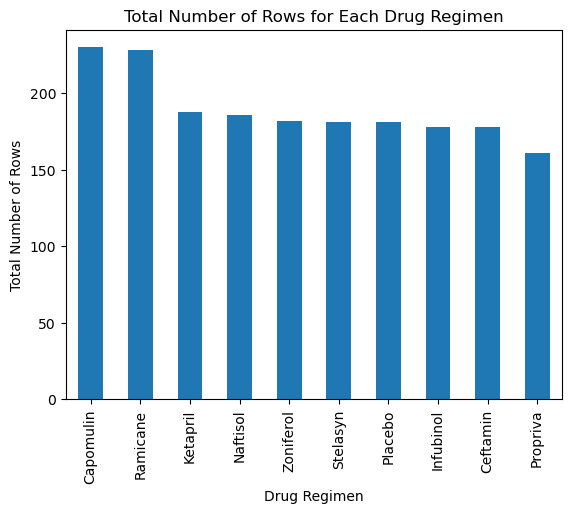

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = merged_data["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar")

# Set labels and title for the plot.
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.title("Total Number of Rows for Each Drug Regimen")

# Show the plot.
plt.show()

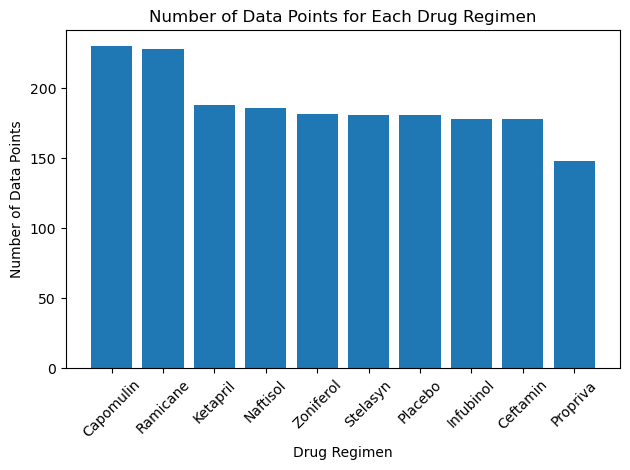

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Count the number of data points for each drug regimen
counts = cleaned_data["Drug Regimen"].value_counts()

# Generate the bar plot using pyplot
plt.bar(counts.index, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation=45)  # Rotate the drug names for better visibility
plt.tight_layout()  # Adjust layout for better visibility
plt.show()


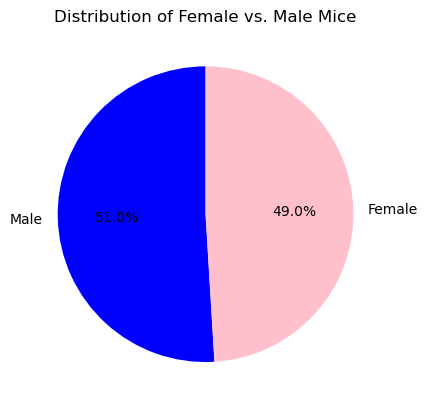

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender_counts = cleaned_data["Sex"].value_counts()

# Generate the pie plot using Pandas
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, title="Distribution of Female vs. Male Mice", colors=['blue', 'pink'], ylabel='')
plt.show()


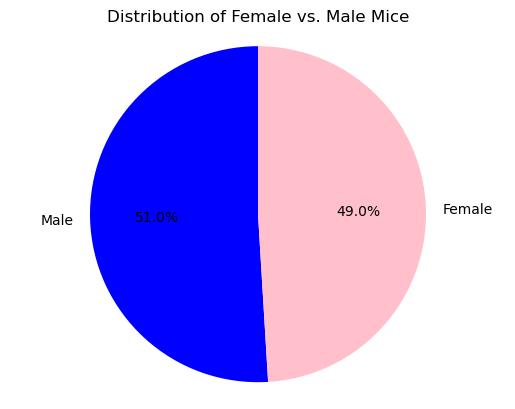

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Count the number of female and male mice
gender_counts = cleaned_data["Sex"].value_counts()

# Generate the pie plot using pyplot
labels = gender_counts.index
sizes = gender_counts.values
colors = ['blue', 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# List of the four drug regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the original DataFrame for these treatments
filtered_data = cleaned_data[cleaned_data["Drug Regimen"].isin(treatment_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge the last timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the resulting DataFrame
print(merged_last_timepoint)

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment to calculate the IQR and find potential outliers
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_last_timepoint[merged_last_timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Append to our tumor_vol_data list
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR for each treatment
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"The IQR for {treatment}: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")

The IQR for Capomulin: 7.781863460000004
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
The IQR for Ramicane: 9.098536719999998
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
The IQR for Infubinol: 11.477135160000003
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
The IQR for Ceftamin: 15.577752179999997
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


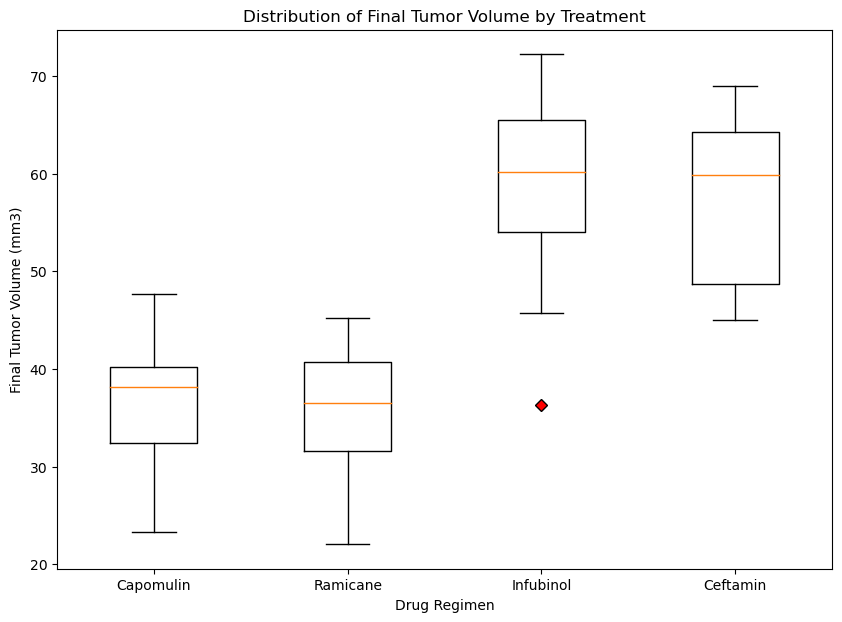

In [23]:
import matplotlib.pyplot as plt

# Generate the box plot
plt.figure(figsize=(10, 7))  # set the figure size
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))

# Add title and labels
plt.title('Distribution of Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Show the plot
plt.show()

## Line and Scatter Plots

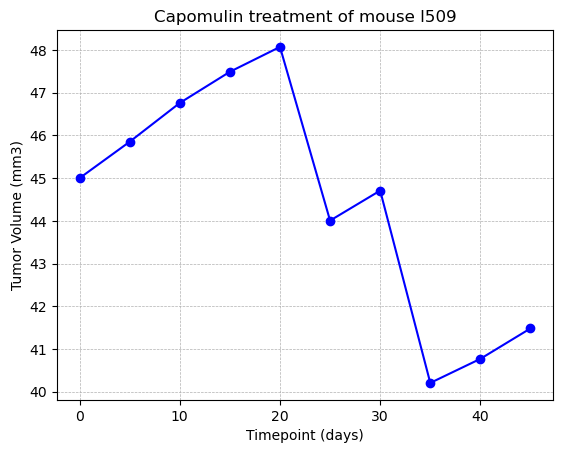

In [24]:
# Filter the data for mouse l509 treated with Capomulin
mouse_l509_data = study_data_complete[(study_data_complete["Drug Regimen"] == "Capomulin") & (study_data_complete["Mouse ID"] == "l509")]

# Generate a line plot for tumor volume vs. time point
plt.plot(mouse_l509_data["Timepoint"], mouse_l509_data["Tumor Volume (mm3)"], marker="o", color="b", linestyle="-")

# Add title, labels, and a grid
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()

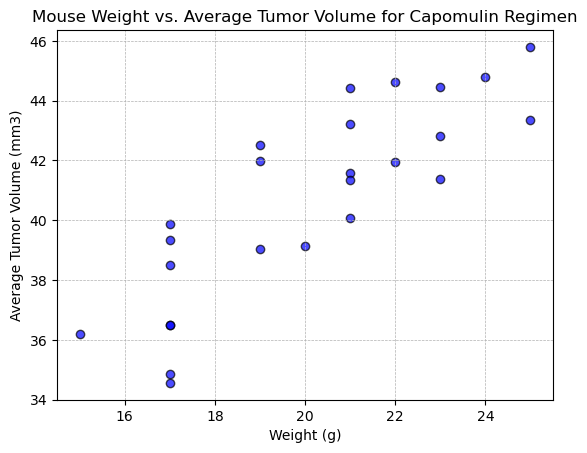

In [27]:
# Filter the data for Capomulin-treated mice
capomulin_data = study_data_complete[study_data_complete["Drug Regimen"] == "Capomulin"]

# Group the Capomulin data by Mouse ID and calculate average weight and tumor volume
average_data = capomulin_data.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
})

# Generate a scatter plot for average weight vs. average tumor volume
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], color="blue", alpha=0.7, edgecolors="black")

# Add title, labels, and a grid
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


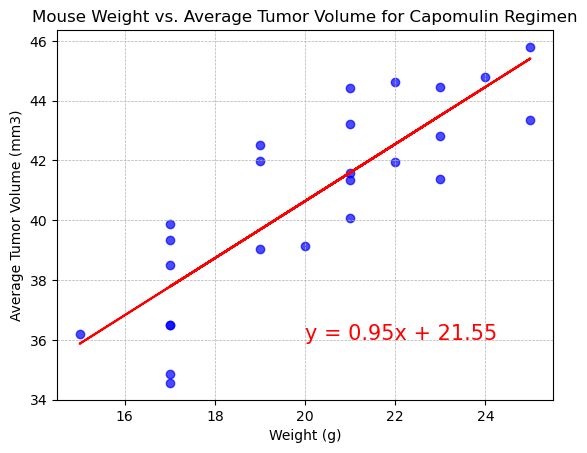

In [28]:
from scipy.stats import linregress, pearsonr

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coefficient:.2f}")

# Calculate the linear regression model
(slope, intercept, r_value, p_value, std_err) = linregress(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"])
regress_values = slope * average_data["Weight (g)"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Generate a scatter plot with the linear regression model
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"], color="blue", alpha=0.7)
plt.plot(average_data["Weight (g)"], regress_values, color="red")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()